# Optimizer 시각화

In [5]:
import numpy as np
import optimizer as opt
import matplotlib.pyplot as plt
from collections import OrderedDict

In [15]:
def f(x, y):
    #x, y = params[0], params[1]
    return x*x / 20.0 + y*y

def df(x, y):
    #x, y = params[0], params[1]
    return np.array((x / 10.0, 2*y))

In [32]:
optimizers = OrderedDict()
optimizers['SGD'] = opt.SGD(lr=0.95)
optimizers['Momentum'] = opt.Momentum(lr=0.1)
optimizers['AdaGrad'] = opt.AdaGrad(lr=1.5)
optimizers['Adam'] = opt.Adam(lr=0.3)

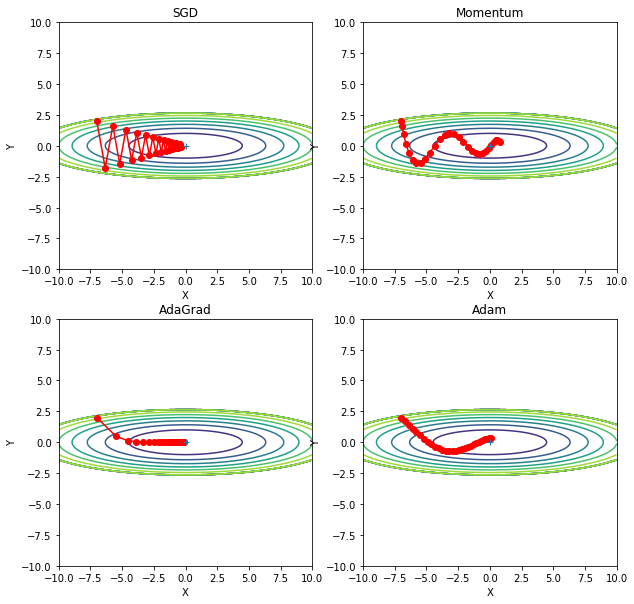

In [33]:
idx = 1
plt.figure(figsize=(10,10))
for key in optimizers:
    optimizer = optimizers[key]
    x_history, y_history = [], []
    params = np.array((-7, 2), dtype=np.float32)
    for i in range(30):
        x_history.append(params[0])
        y_history.append(params[1])
        grads = df(params[0], params[1])
        optimizer.update(params, grads)
        
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'ro-')
    plt.contour(X, Y, Z)
    plt.xlim(-10, 10), plt.ylim(-10, 10)
    plt.plot(0, 0, '+')
    plt.title(key), plt.xlabel('X'), plt.ylabel('Y')
    
plt.show()    